## Plotting a NDDataset

<div class='alert alert-info'>

**NOTE** : By default, all matplolib figures will be plotted **inline** in this notebook. 
to change this behaviour, uncomment the next line (which must be placed before importing the  ``spectrochempy.api`` library!

</div>

In [1]:
#%matplotlib  

In [2]:
from spectrochempy.api import *


        SpectroChemPy's API
        Version   : 0.1a2.post36
        Copyright : 2014-2017 - LCS (Laboratory for Catalysis and Spectrochempy)
            


Let's first import a NDDataset from a file:

In [3]:
import os
source = NDDataset.read_omnic(os.path.join(data, 'irdata', 'NH4Y-activation.SPG'))
print(source.description)

Dataset from spg file : NH4Y-activation.SPG 
History of the 1st spectrum: vz0521.spa, Thu Jul 07 06:10:41 2016 (GMT+02:00)


To plot a dataset, use the `plot` command (generic plot). As the current NDDataset is 2D, a contour plot is displayed by default.

<IPython.core.display.Javascript object>


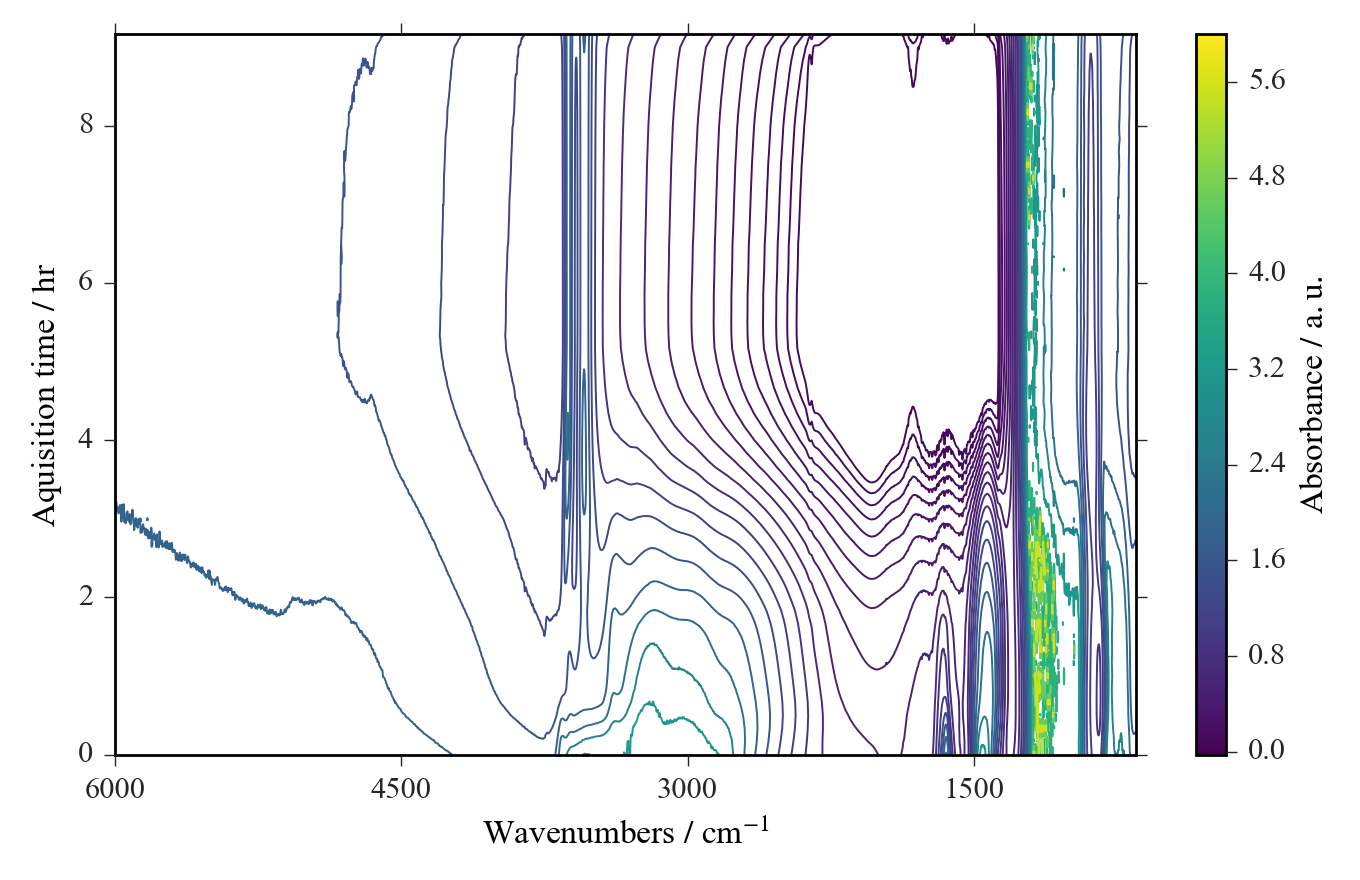

In [15]:
source.plot()  

Note that by default, *serif* font is used. 

But if you prefer, *sans-serif* font can be used instead:

<IPython.core.display.Javascript object>


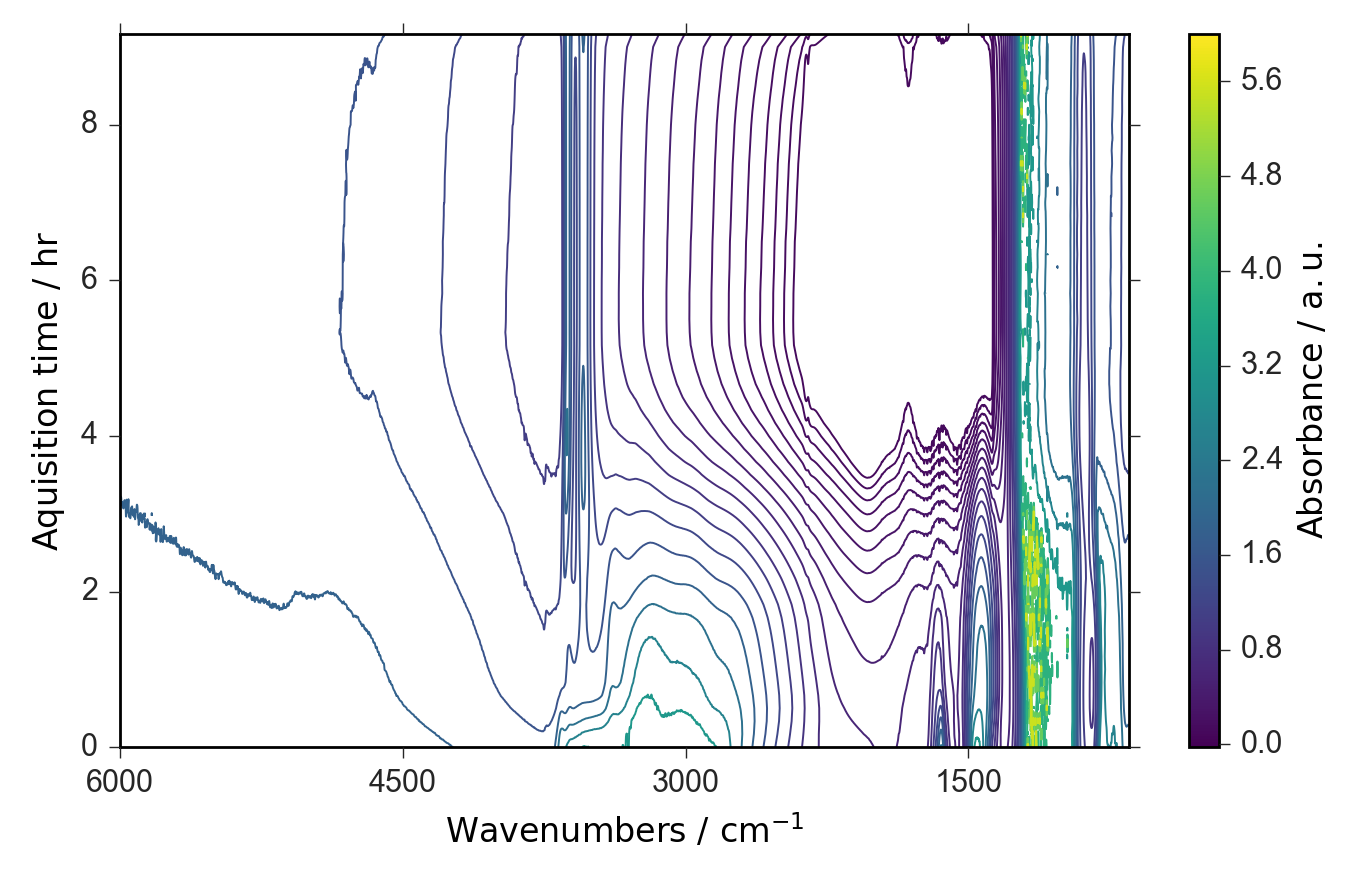

In [16]:
source.plot(style='sans')

Other styles are :
* paper , which create figure suitable for two columns article (fig width: 3.4 inch)
* poster
* talk
* grayscale

<IPython.core.display.Javascript object>


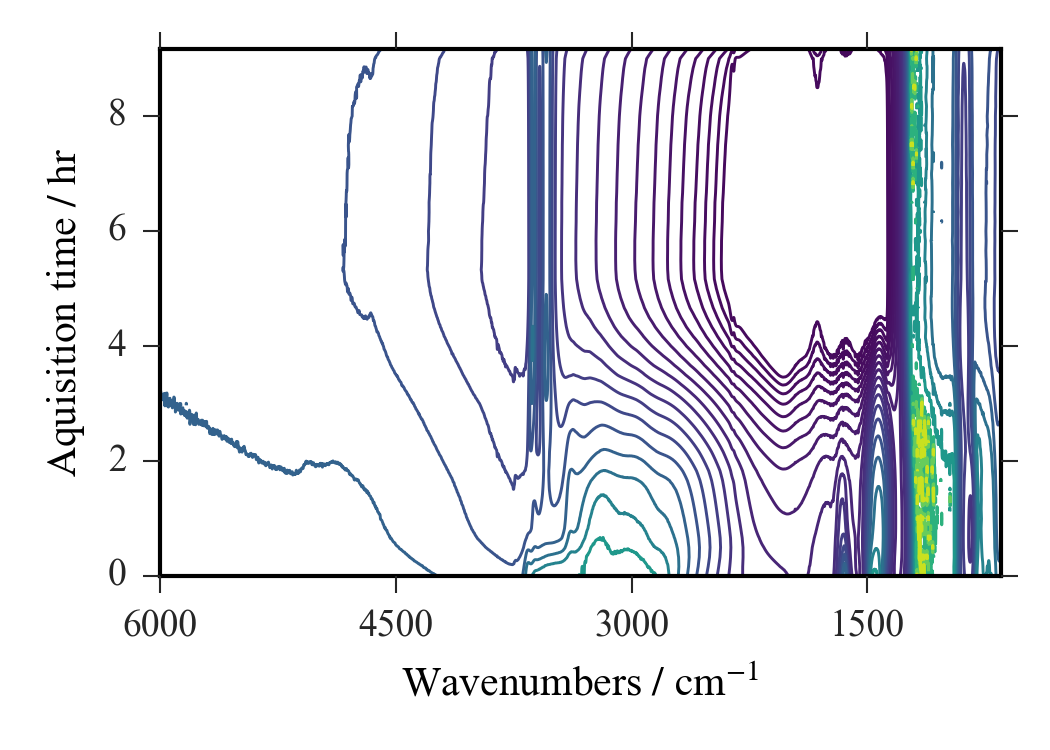

In [17]:
source.plot(style='paper', colorbar=False)

these styles can be combined

<IPython.core.display.Javascript object>


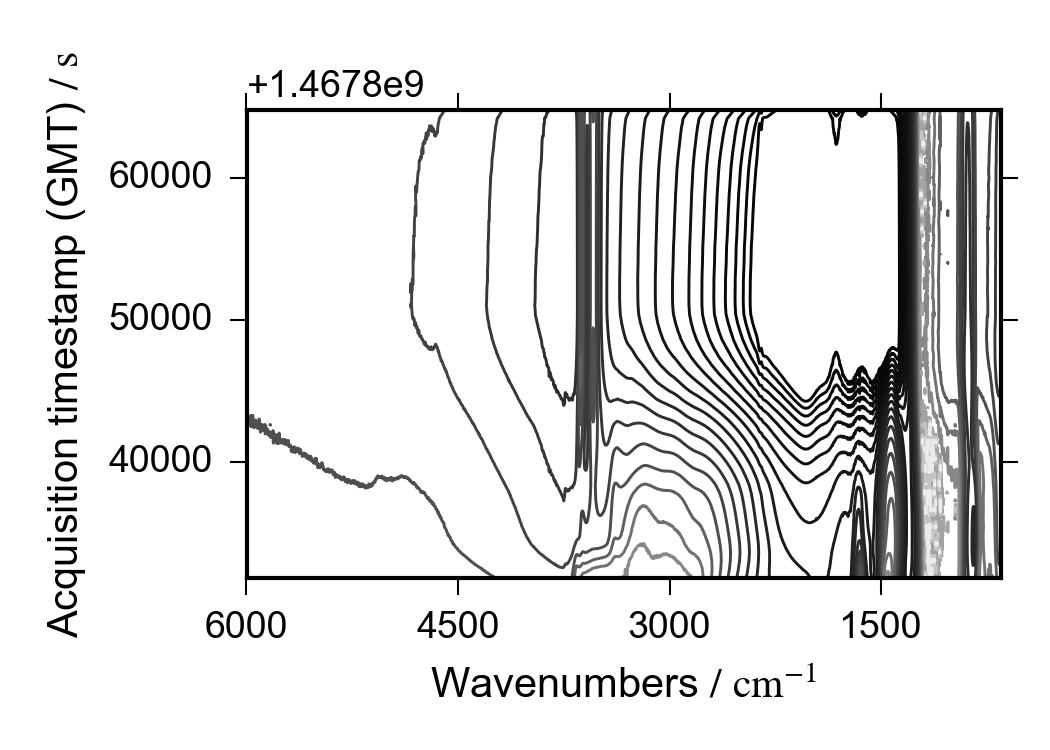

In [7]:
p = source.plot(style=['paper','sans','grayscale'], colorbar=False)

New styles can also be created, using a simple dictionary:

<IPython.core.display.Javascript object>


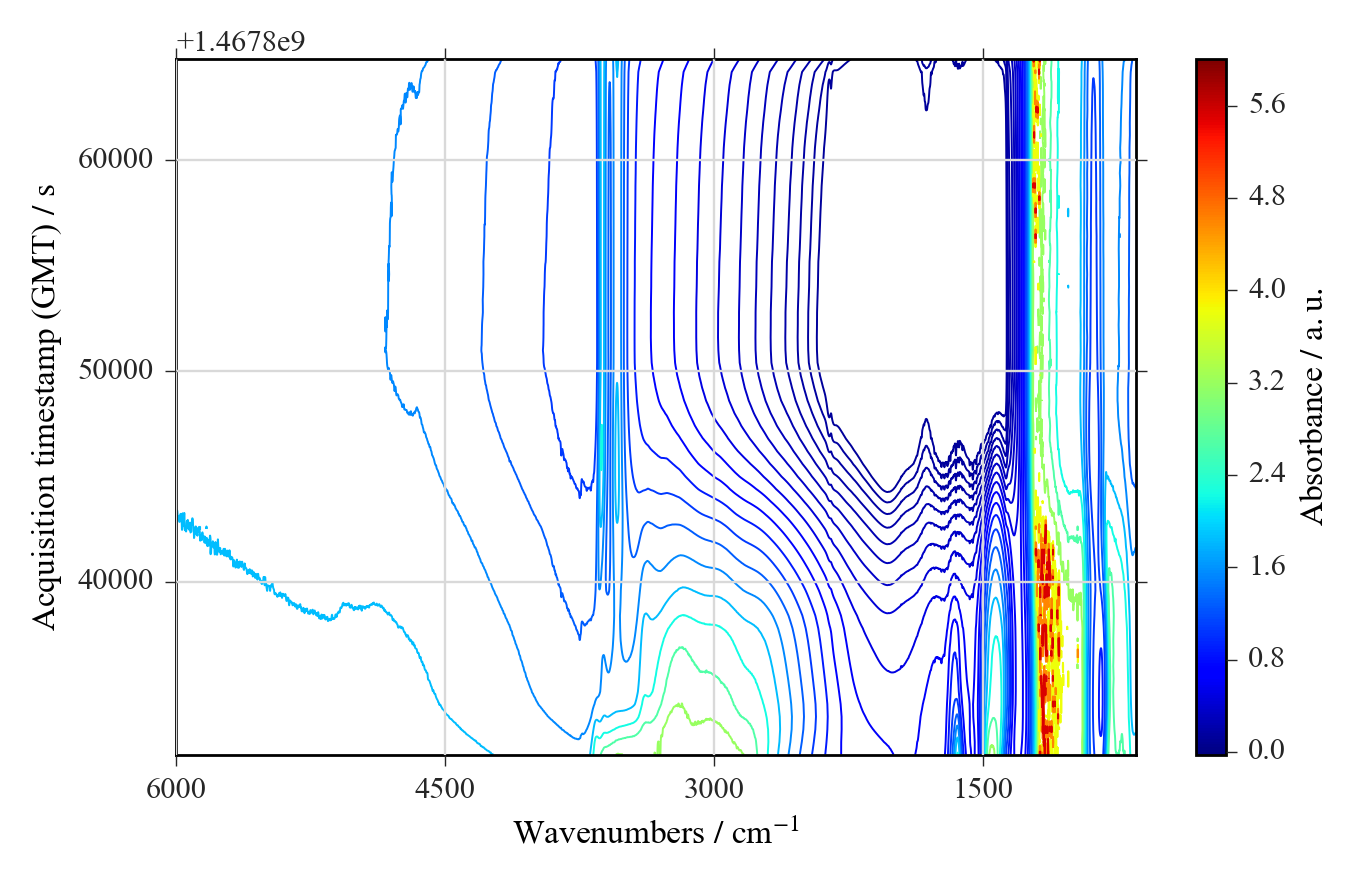

In [8]:
mystyle={'image.cmap':'jet', 
         'font.size':12, 
         'font.weight':'bold', 
         'axes.grid':True}

p = source.plot(style=mystyle)

To display all entry for definig plot style, uncomment the next line:

In [9]:
import matplotlib as mpl
# mpl.rcParams

### Changing axis
The `y` axis with timestamp in the above plots is not very informative, lets rescale it in hours and change the origin. 

<IPython.core.display.Javascript object>


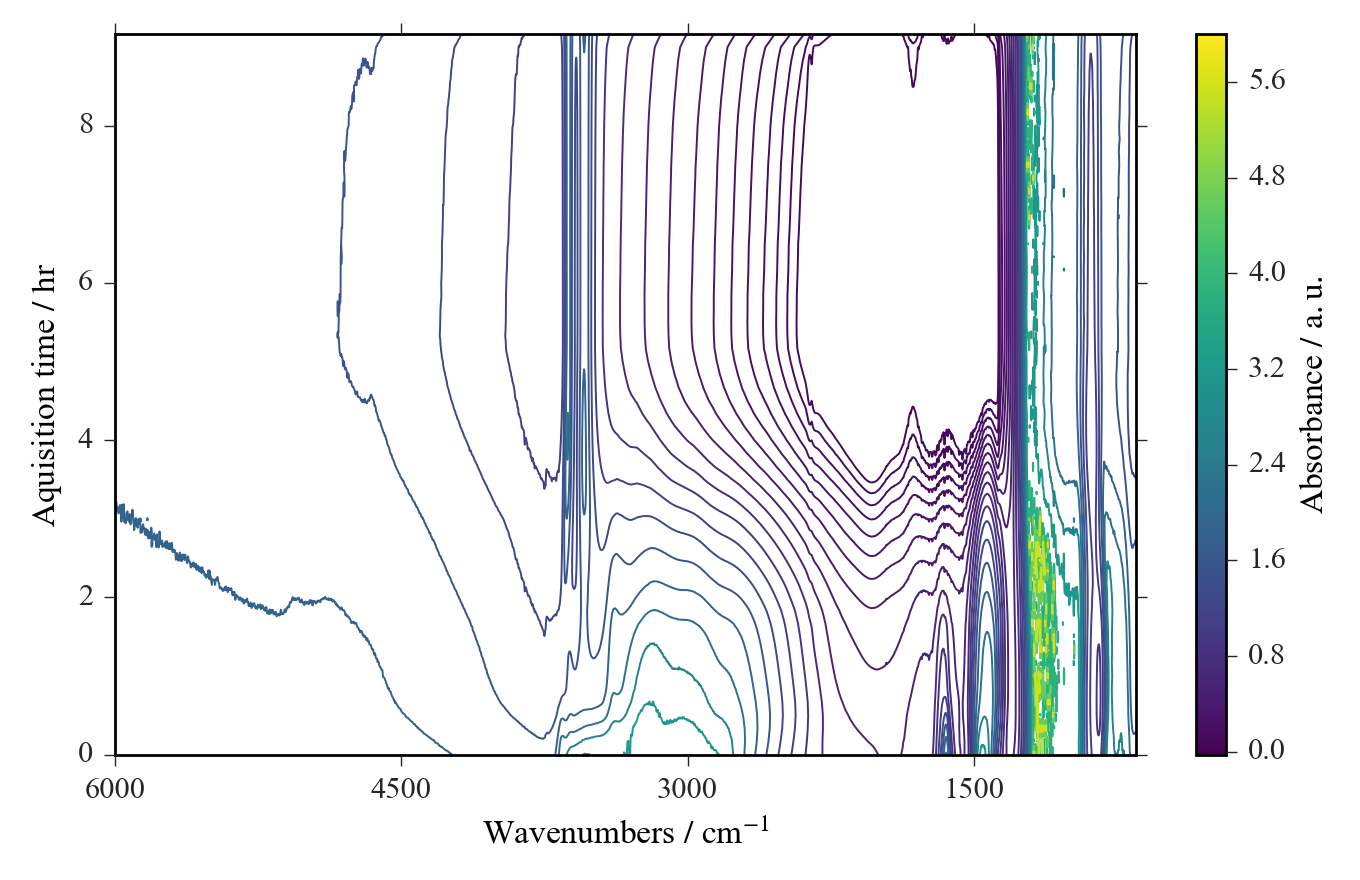

In [10]:
source.y -= source.y[0]                # change origin
source.y.title = u'Aquisition time'    # change the title (default axis label)
source.y.to('hour')                    # change unit base
p = source.plot()

By default, plots are done in contour mode.

If you like to have stacked plot, you can use:

<IPython.core.display.Javascript object>


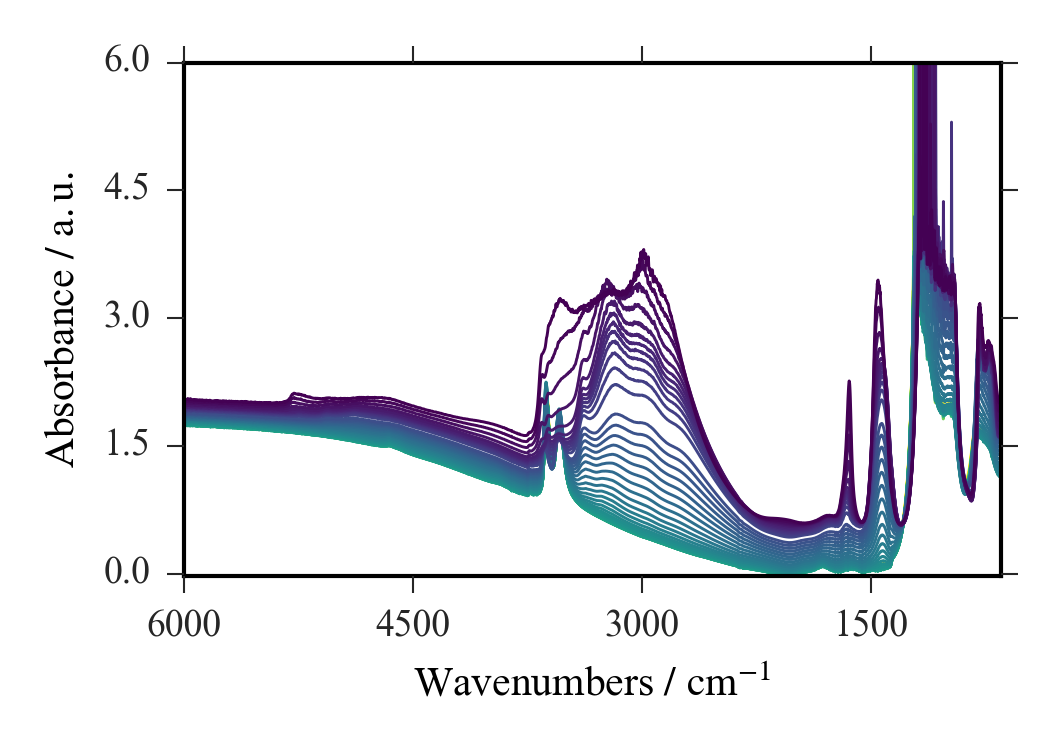

In [11]:
p = source.plot(kind='stack', style='paper', colorbar=False)
source.style

In [12]:
plt.rcParams


RcParams({'_internal.classic_mode': True,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'mpeg4',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'round_numbers',
          'axes.axisbelow': False,
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.offset_threshold': 2,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
     

In [13]:
available_styles

['notebook', 'paper', 'poster', 'talk', 'sans']

<IPython.core.display.Javascript object>


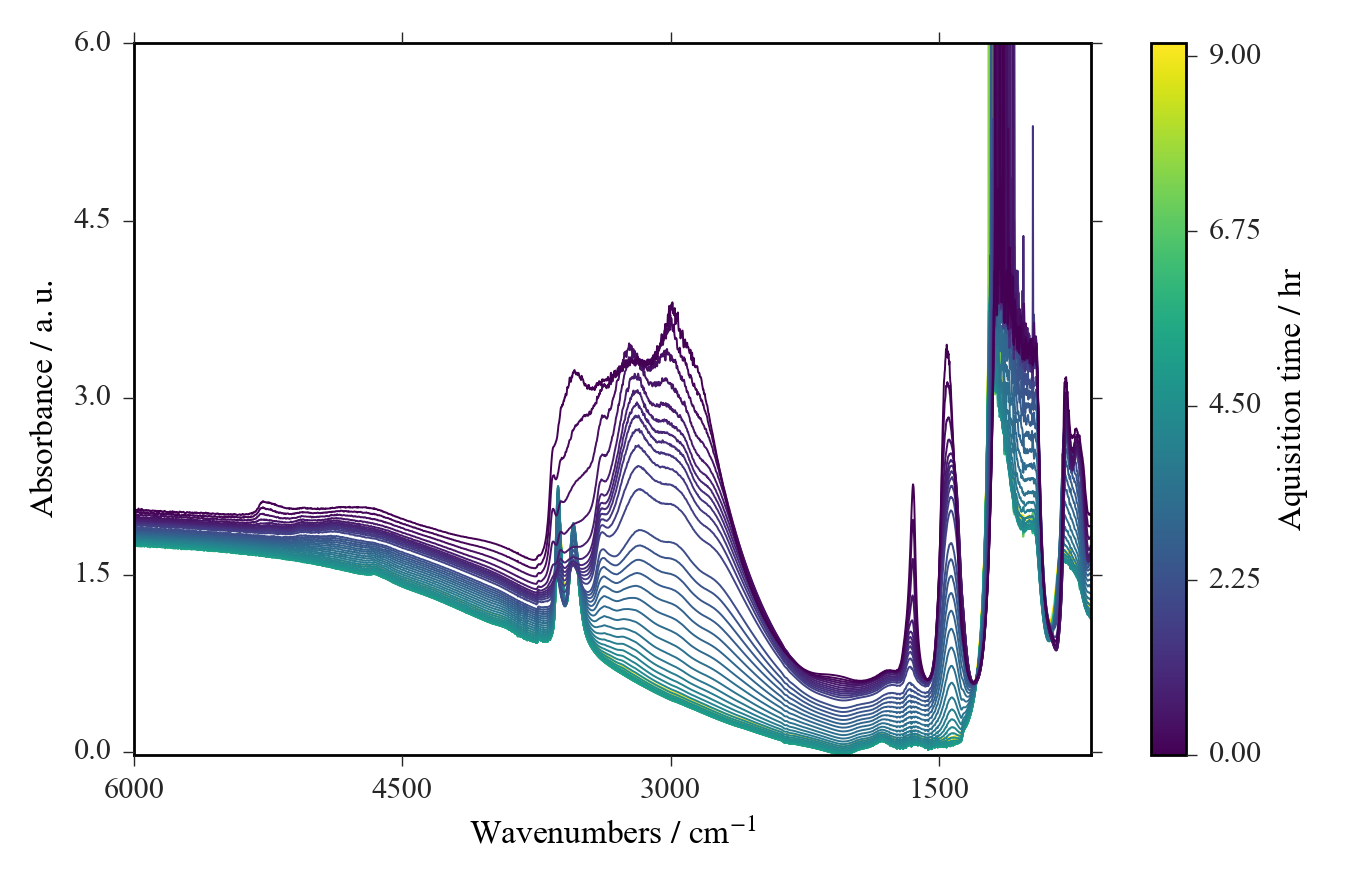

In [14]:
 # list all available styles 
p = source.plot(kind='stack')

We can change or add labels to axes after creation of the dataset